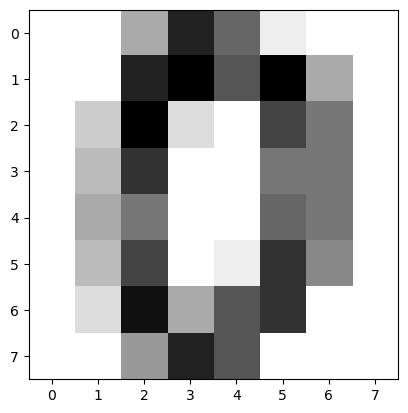

In [11]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [12]:
n_samples = len(digits.images)

data = digits.images.reshape((n_samples, -1))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2)

In [14]:
print("X train :", X_train.shape)
print("y train :", y_train.shape)
print("X test :", X_test.shape)
print("y test :", y_test.shape)

X train : (1437, 64)
y train : (1437,)
X test : (360, 64)
y test : (360,)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [16]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.9472222222222222
[[40  0  0  0  0  0  0  0  0  0]
 [ 0 29  0  1  0  0  0  0  1  0]
 [ 0  0 37  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  1]
 [ 0  0  0  0 23  0  0  1  0  0]
 [ 0  0  0  1  0 40  0  1  0  4]
 [ 0  0  0  0  1  1 41  0  0  0]
 [ 0  0  0  0  0  0  0 29  0  1]
 [ 0  2  1  0  0  1  0  0 33  0]
 [ 0  1  0  0  0  0  0  1  0 35]]


In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [18]:
# 테스트 데이터로 예측해본다.

y_pred = knn.predict(X_test)
# 정확도를 계산한다.

scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

0.9777777777777777


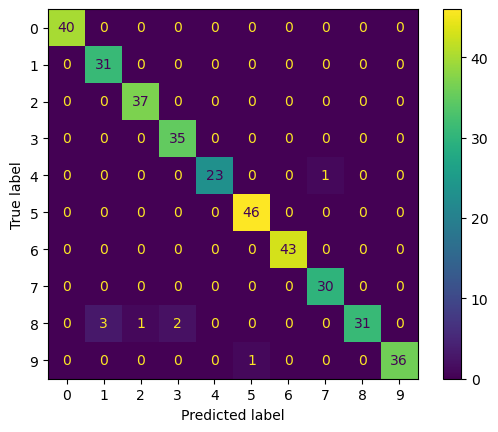

In [19]:
disp = metrics.plot_confusion_matrix(knn, X_test, y_test)
plt.show()

In [24]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [107]:
# SVM 모델 학습 및 평가
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_cm = confusion_matrix(y_test, svm_pred)
print("SVM confusion matrix:")
print(svm_cm)

SVM confusion matrix:
[[40  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  0  0]
 [ 0  0 37  0  0  0  0  0  0  0]
 [ 0  0  0 35  0  0  0  0  0  0]
 [ 0  0  0  0 24  0  0  0  0  0]
 [ 0  0  0  0  0 45  0  0  0  1]
 [ 1  0  0  0  3  0 39  0  0  0]
 [ 0  0  1  0  0  0  0 28  0  1]
 [ 0  3  0  1  0  0  0  0 33  0]
 [ 0  0  0  0  0  1  0  0  0 36]]


In [28]:
clf_lr = LogisticRegression(random_state=12)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print(clf_lr.score(X_train, y_train))

0.9993041057759221


In [29]:
clf_dt = DecisionTreeClassifier(random_state=10)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print(clf_dt.score(X_train, y_train))

1.0


In [30]:
rf_clf = RandomForestClassifier(random_state=10)
rf_clf.fit(X_train, y_train)

pred_rf = rf_clf.predict(X_test)

print(rf_clf.score(X_train, y_train))

1.0


In [104]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD,Adam

In [110]:
# 딥러닝 모델 생성
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [112]:
model_history=model.fit(x = X_train, y = y_train, epochs=100, batch_size=32, validation_data = (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

Epoch 1/100
45/45 [==============================] - 0s 7ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1015 - val_accuracy: 0.9694
Epoch 2/100
45/45 [==============================] - 0s 6ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.1013 - val_accuracy: 0.9694
Epoch 3/100
45/45 [==============================] - 0s 5ms/step - loss: 9.6059e-04 - accuracy: 1.0000 - val_loss: 0.1017 - val_accuracy: 0.9694
Epoch 4/100
45/45 [==============================] - 0s 6ms/step - loss: 8.9409e-04 - accuracy: 1.0000 - val_loss: 0.1026 - val_accuracy: 0.9694
Epoch 5/100
45/45 [==============================] - 0s 6ms/step - loss: 8.3656e-04 - accuracy: 1.0000 - val_loss: 0.1023 - val_accuracy: 0.9694
Epoch 6/100
45/45 [==============================] - 0s 6ms/step - loss: 7.8803e-04 - accuracy: 1.0000 - val_loss: 0.1012 - val_accuracy: 0.9694
Epoch 7/100
45/45 [==============================] - 0s 5ms/step - loss: 7.4328e-04 - accuracy: 1.0000 - val_loss: 0.1023 - val_accuracy: 

45/45 [==============================] - 0s 6ms/step - loss: 8.6662e-05 - accuracy: 1.0000 - val_loss: 0.1120 - val_accuracy: 0.9694
Epoch 58/100
45/45 [==============================] - 0s 6ms/step - loss: 8.3784e-05 - accuracy: 1.0000 - val_loss: 0.1122 - val_accuracy: 0.9694
Epoch 59/100
45/45 [==============================] - 0s 6ms/step - loss: 8.1348e-05 - accuracy: 1.0000 - val_loss: 0.1122 - val_accuracy: 0.9694
Epoch 60/100
45/45 [==============================] - 0s 6ms/step - loss: 7.8776e-05 - accuracy: 1.0000 - val_loss: 0.1121 - val_accuracy: 0.9694
Epoch 61/100
45/45 [==============================] - 0s 6ms/step - loss: 7.5957e-05 - accuracy: 1.0000 - val_loss: 0.1126 - val_accuracy: 0.9694
Epoch 62/100
45/45 [==============================] - 0s 6ms/step - loss: 7.3427e-05 - accuracy: 1.0000 - val_loss: 0.1126 - val_accuracy: 0.9694
Epoch 63/100
45/45 [==============================] - 0s 6ms/step - loss: 7.1030e-05 - accuracy: 1.0000 - val_loss: 0.1129 - val_accuracy

AxisError: axis 1 is out of bounds for array of dimension 1

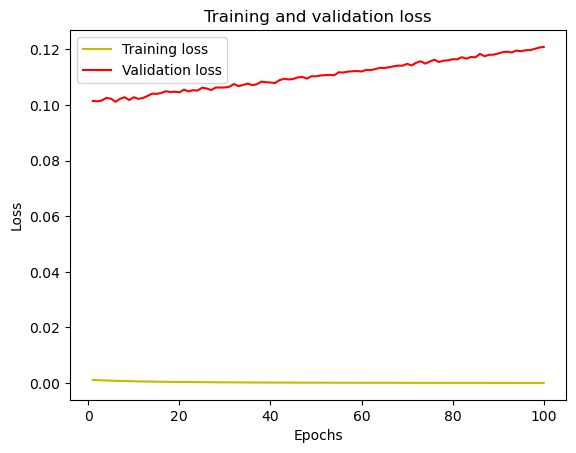

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

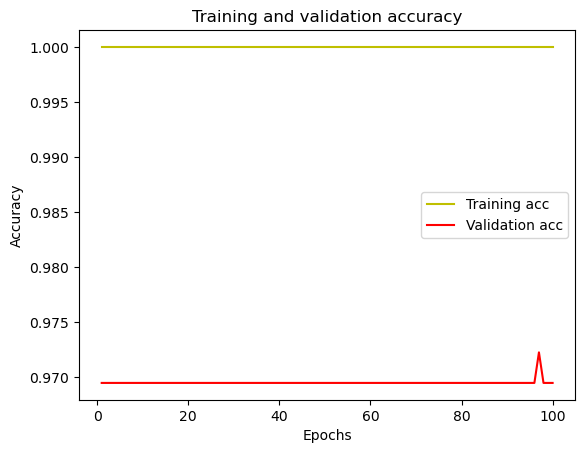

In [114]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()